# Basic Thresholding
***
Thresholding is useful for segmenting up images and determing different features based on pixel values.

### Setup

In [2]:
# notebook imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading in images used in notebook
flowers = cv2.imread('../Image_Data/flowers.jpg')
flowers = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
flowers_gray = cv2.cvtColor(flowers, cv2.COLOR_RGB2GRAY)
cw_puzzle = cv2.imread('../Image_Data/NY_Times_CW_Puzzle.jpg', cv2.IMREAD_GRAYSCALE)

In [91]:
# method to viewed images larger, used to enlarge crossword images 
def view_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

***
### Binary Thresholds
The simplest form of thresholding is binary thresholding. Binary thresholding is applied to grayscale images. If the pixel intensity value is greater than the threshold value, that pixel is set to the maximum value decided upon. Otherwise, that pixel is set to 0. Inverse binary thresholding is the exact opposite. Please refer to the references and documentation for further explanations. In the example below, the max value is 255 and the threshold value is 135.

In [86]:
ret, binary_flowers = cv2.threshold(dog_gray, 135, 255, cv2.THRESH_BINARY)

In [88]:
ret, inv_binary_flowers = cv2.threshold(flowers_gray, 135, 255, cv2.THRESH_BINARY_INV)

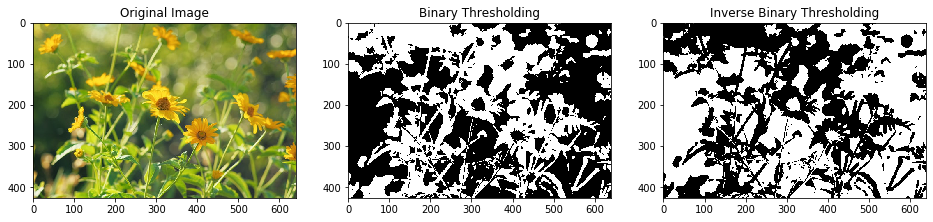

In [90]:
fig, axarr = plt.subplots(1, 3, figsize=(16, 16))
axarr[0].set_title('Original Image')
axarr[0].imshow(flowers)
axarr[1].set_title('Binary Thresholding')
axarr[1].imshow(binary_flowers, cmap='gray')
axarr[2].set_title('Inverse Binary Thresholding')
axarr[2].imshow(inv_binary_flowers, cmap='gray')

The results of these thresholding methods are shown above.

***
### Adaptive Thresholding
Beyond basic binary thresholding a kernel can first be applied to the image to find individual threshold values for each neighborhood and then thresholded some form of a binary threshold using the adaptiveThreshold() method in opencv. These often perform much better than regular binary thresholds because they first calculate unique thresholds for different regions of the image using a kernel. However, in the example below, both binary and adaptive thresholding must be used to achieve a better result.

Both the gaussian and mean kernel are available to use in adaptive thresholding. The mean kernel was used for the following example. Please read the documentation and refer to the references for more in-depth information on the available kernels and thresholding techniques.

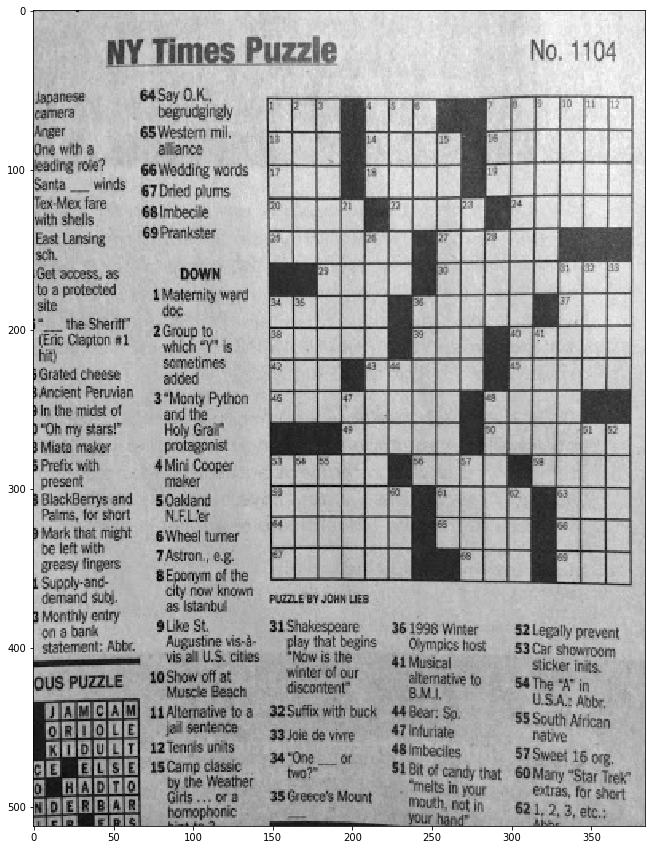

In [66]:
# crossword puzzle example - adaptive thresholding
view_pic(cw_puzzle)

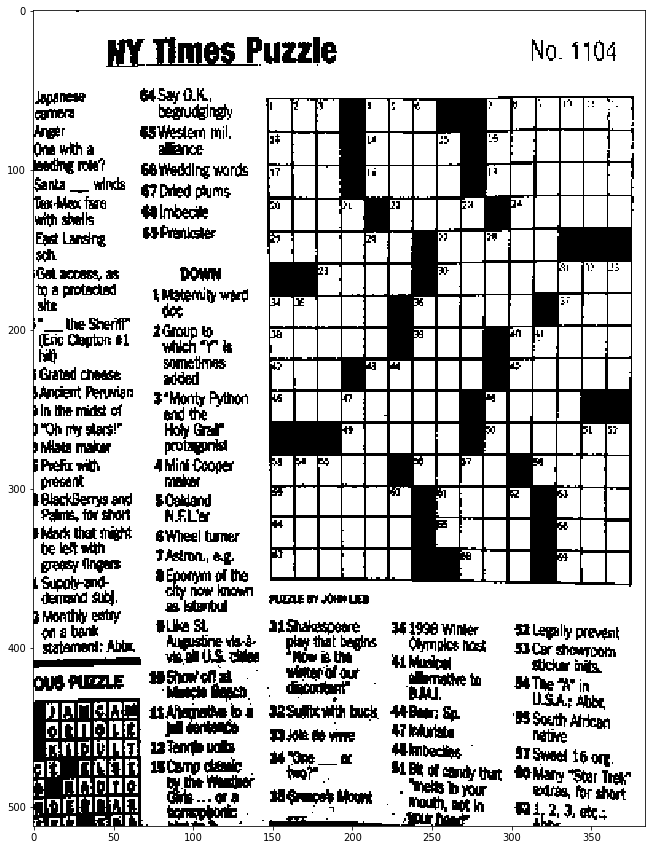

In [78]:
# Applying binary thresholding
ret, thresh1 = cv2.threshold(cw_puzzle, 140, 255, cv2.THRESH_BINARY)
view_pic(thresh1)

Binary thresholding alone blurs some of the crossword lines and many of the words become distorted and illegible.

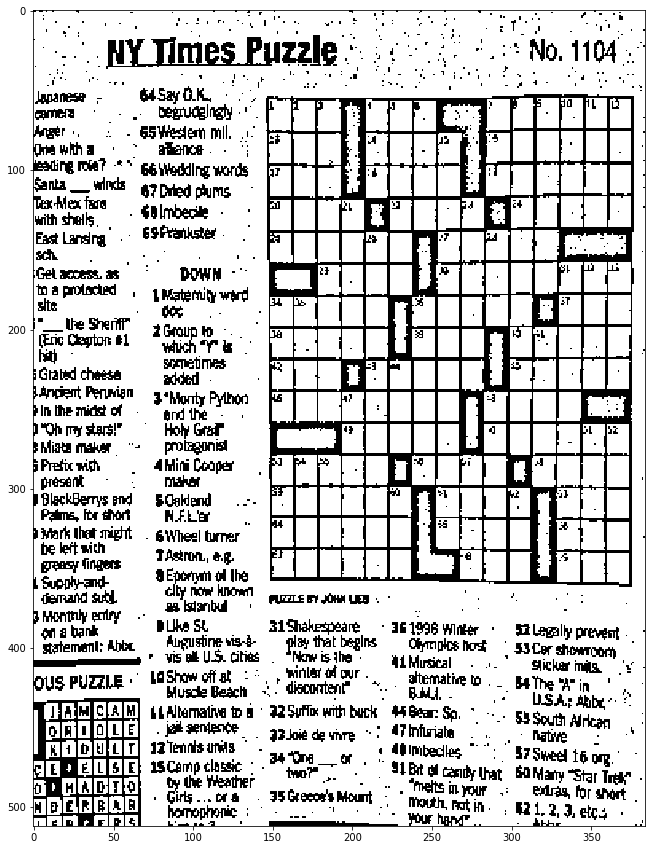

In [93]:
# Using adaptive threshold mean minus C to find the new threshold value and applying binary thresholding
thresh2 = cv2.adaptiveThreshold(cw_puzzle, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 10)
view_pic(thresh2)

Using a mean kernel with binary thresholding lessens word distortion, but black crossword boxes are no longer filled in. There is also a decent amount of salt and pepper noise scattered throughout the image.

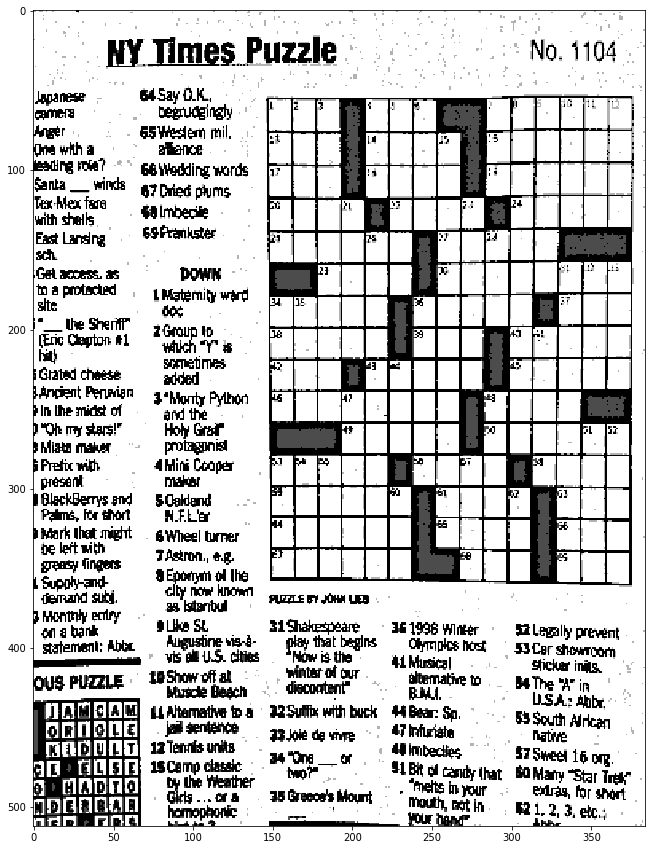

In [72]:
# combining the two thresholds together using blending
res = cv2.addWeighted(thresh1, 0.7, thresh2, 0.3, 0)
view_pic(res)

By combining the two thresholds, a much more acceptable result was achieved. While this result is still not the greatest, it is much better than the results of the basic thresholds themselves.

***
### References
* opencv threshold types: https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576
* adaptive threshold types: https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gaa42a3e6ef26247da787bf34030ed772c
* python thresholding example: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
* C++ thresholding example: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
* another C++ example: https://docs.opencv.org/2.4/doc/tutorials/imgproc/threshold/threshold.html
***